# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ataka Dzulfikar]
- **Email:** [zullneedbackup@gmail.com]
- **ID Dicoding:** [atakadzulfikar]

## Menentukan Pertanyaan Bisnis

- 1. Jam berapa paling banyak dan paling sedikit terjadi penyewaaan sepeda?
- 2. Hari apa terjadi penyewaan sepeda paling banyak?
- 3. Pada musim apa penyewaan sepeda paling banyak?
- 4. Bagaimana grafik performa penjualan sepeda pada kedua tahun tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
# import library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

### Gathering Data

In [2]:
# Gathering data merupakan proses mengumpulkan data dari berbagai sumber.
# digunakan untuk mengecek file day csv
day_df = pd.read_csv('data/day.csv')
day_df.info()
day_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# digunakan untuk mengecek file hour csv
hour_df = pd.read_csv('data/hour.csv')
hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
# Assesing data merupakan tahap awal dalam analisis data.
print(day_df.head())
print(day_df.describe()) 
print(day_df.describe(include='object'))


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
          instant      sea

In [5]:
# Menampilkan dataframe hour atau jam

print(hour_df.head())
print(hour_df.describe()) 
print(hour_df.describe(include='object'))

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
          instant        season            yr          mnth            hr  \
count  17379.0000  173

In [6]:
# digunakan untuk mengecek nilai yang hilang pada day_df
print(day_df.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
# digunakan untuk mengecek nilai yang hilang pada hour_df
print(hour_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
# mengecek duplikasi data
print("duplikasi day = " , day_df.duplicated().sum())
print("duplikasi hour = " , hour_df.duplicated().sum())

duplikasi day =  0
duplikasi hour =  0


In [9]:
# mengecek paramater dari tabel day
print(day_df.describe()) 
print(day_df.describe(include='object'))

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [10]:
# mengecek paramater dari tabel hour
print(hour_df.describe()) 
print(hour_df.describe(include='object'))

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

### Cleaning Data

Dropping

In [11]:
# disini saya akan menghilangkan kolom working day 
hour_df.drop(columns=['workingday'], inplace=True)
day_df.drop(columns=['workingday'], inplace=True)

Rename

Mengganti nama kolom agar lebih mudah terbaca

In [12]:
#Mengganti nama kolom pada tabel day
day_df = day_df.rename(columns={'instant': 'record_index', 'dteday': 'date', 'season': 'season', 'yr': 'year', 'mnth': 'month','weathersit': 'weather', 'temp': 'temperature', 'atemp': 'feels_like_temp', 'hum': 'humidity', 'windspeed': 'wind_speed', 'casual': 'casual_users', 'registered': 'registered_users', 'cnt': 'total_count'})

In [13]:
#Mengganti nama kolom pada tabel hour
hour_df = hour_df.rename(columns={'instant': 'record_index', 'dteday': 'date', 'season': 'season', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'weathersit': 'weather', 'temp': 'temperature', 'atemp': 'feels_like_temp', 'hum': 'humidity', 'windspeed': 'wind_speed', 'casual': 'casual_users', 'registered': 'registered_users', 'cnt': 'total_count'})

Mengubah Tipe Data


In [14]:
# Mengubah tipe data objek ke datetime
day_df['date'] = pd.to_datetime(day_df['date'])
hour_df['date'] = pd.to_datetime(hour_df['date'])

In [15]:
menampilkan dataframe day dan hour 
print(day_df.columns)
print(hour_df.columns)

Index(['record_index', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'weather', 'temperature', 'feels_like_temp', 'humidity', 'wind_speed',
       'casual_users', 'registered_users', 'total_count'],
      dtype='object')
Index(['record_index', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'weather', 'temperature', 'feels_like_temp', 'humidity',
       'wind_speed', 'casual_users', 'registered_users', 'total_count'],
      dtype='object')


In [16]:
# mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'month', 'holiday', 'weekday', 'weather']

In [17]:
# Konversi isi untuk musim
musim = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}

day_df['season'] = day_df['season'].map(musim)
hour_df['season'] = hour_df['season'].map(musim)

# Konversi isi untuk bulan
bulan = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April',
    5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus',
    9: 'September', 10: 'Oktober', 11: 'November', 12: 'December'
}

day_df['month'] = day_df['month'].map(bulan)
hour_df['month'] = hour_df['month'].map(bulan)

# Konversi isi untuk Hari dalam Minggu
perminggu = {
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu',
    4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
}

day_df['weekday'] = day_df['weekday'].map(perminggu)
hour_df['weekday'] = hour_df['weekday'].map(perminggu)

# Konversi isi untuk Kondisi Cuaca
cuaca = {
    1: 'Cerah', 2: 'Mendung Berawan', 3: 'Hujan Ringan', 4: 'Hujan Lebat'
}

day_df['weather'] = day_df['weather'].map(cuaca)
hour_df['weather'] = hour_df['weather'].map(cuaca)


## Exploratory Data Analysis (EDA)

Explore Data Day

In [18]:
# digunakan untuk melihat day dataframe secara keseluruhan
day_df.describe(include='all')

,record_index,date,season,year,month,holiday,weekday,weather,temperature,feels_like_temp,humidity,wind_speed,casual_users,registered_users,total_count
count,731.000000,731,731,731.000000,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Gugur,NaN,Januari,NaN,Sabtu,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,NaN,0.028728,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,NaN,0.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,NaN,0.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,NaN,1.000000,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
# Tentukan urutan hari dalam seminggu
urutan_hari = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']

# Ubah kolom 'weekday' menjadi kategori dengan urutan khusus
day_df['weekday'] = pd.Categorical(day_df['weekday'], categories=urutan_hari, ordered=True)

# Kelompokkan data berdasarkan 'weekday' dan urutkan sesuai urutan kategori
hasil = day_df.groupby('weekday', observed=True)['total_count'].sum().reset_index()

# Tampilkan hasil
print(hasil)

  weekday  total_count
0  Minggu       444027
1   Senin       455503
2  Selasa       469109
3    Rabu       473048
4   Kamis       485395
5   Jumat       487790
6   Sabtu       477807


In [20]:
# Tentukan urutan bulan dalam setahun
urutan_bulan = [
    'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
    'Juli', 'Agustus', 'September', 'Oktober', 'November', 'December'
]

# Ubah kolom 'month' menjadi kategori dengan urutan khusus
day_df['month'] = pd.Categorical(day_df['month'], categories=urutan_bulan, ordered=True)

# Kelompokkan data berdasarkan 'month' dan hitung total per bulan
hasil_bulan = day_df.groupby('month', observed=True)['total_count'].sum().reset_index()

# Tampilkan hasil
print(hasil_bulan)


        month  total_count
0     Januari       134933
1    Februari       151352
2       Maret       228920
3       April       269094
4         Mei       331686
5        Juni       346342
6        Juli       344948
7     Agustus       351194
8   September       345991
9     Oktober       322352
10   November       254831
11   December       211036


In [21]:
# Menentukan urutan musim dalam setahun
urutan_musim = [
    'Semi', 'Panas', 'Gugur', 'Dingin'
]

# Ubah kolom 'season' menjadi kategori dengan urutan khusus
day_df['season'] = pd.Categorical(day_df['season'], categories=urutan_musim, ordered=True)

# Kelompokkan data berdasarkan 'season' dan hitung total musim
hasil_musim = day_df.groupby('season', observed=True)['total_count'].sum().reset_index()

# Menampilkan hasil musim
print(hasil_musim)

   season  total_count
0    Semi       471348
1   Panas       918589
2   Gugur      1061129
3  Dingin       841613


In [22]:
# Menentukan urutan cuaca dalam setahun
urutan_cuaca = [
    'Cerah', 'Mendung Berawan', 'Hujan Ringan', 'Hujan Lebat'
]

# Ubah kolom 'weather' menjadi kategori dengan urutan khusus
day_df['weather'] = pd.Categorical(day_df['weather'], categories=urutan_cuaca, ordered=True)

# Kelompokkan data berdasarkan 'weather' dan hitung total cuaca
hasil_cuaca = day_df.groupby('weather', observed=True)['total_count'].sum().reset_index()

# Menampilkan hasil cuaca
print(hasil_cuaca)

           weather  total_count
0            Cerah      2257952
1  Mendung Berawan       996858
2     Hujan Ringan        37869


Explore Hour Data

In [23]:
# Digunakan untuk melihat dataframe hour secara keseluruhan
hour_df.describe(include="all")

,record_index,date,season,year,month,hour,holiday,weekday,weather,temperature,feels_like_temp,humidity,wind_speed,casual_users,registered_users,total_count
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Gugur,NaN,Mei,NaN,NaN,Sabtu,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,NaN,11.546752,0.028770,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,NaN,6.000000,0.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,NaN,12.000000,0.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,NaN,18.000000,0.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,NaN,23.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [24]:
# Menampilkan total jam dan total penghitungan
hour_df.groupby('hour')['total_count'].sum().reset_index()

,hour,total_count
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


## Visualization & Explanatory Analysis

### Pertanyaan 1: Jam berapa paling banyak dan paling sedikit terjadi penyewaaan sepeda?

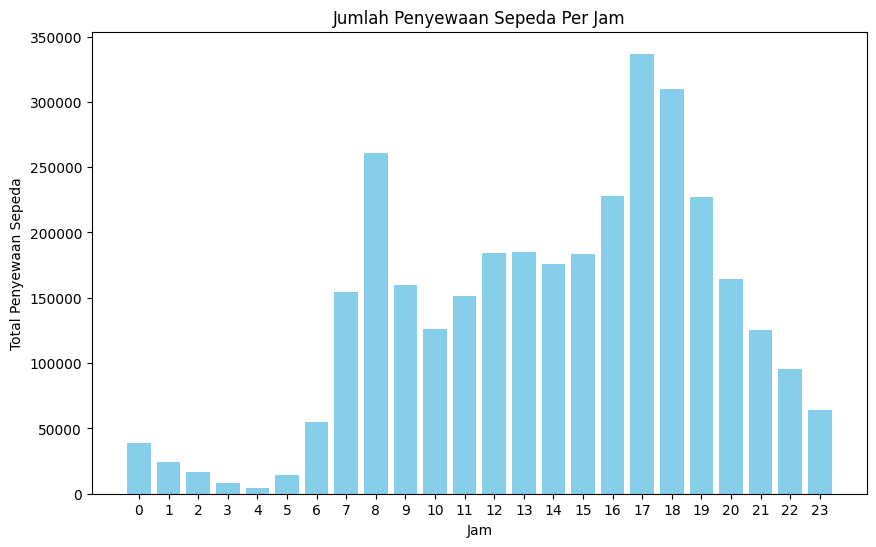

In [25]:
# Mengelompokkan data berdasarkan jam dan menghitung menjadi total penyewaan
hourly_rentals = hour_df.groupby('hour')['total_count'].sum().reset_index()

# Menampilkan ke bentuk bar plot
plt.figure(figsize=(10, 6))
plt.bar(hourly_rentals['hour'], hourly_rentals['total_count'], color='skyblue')

# Menambahkan label jam dan total penyewaan sepeda
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan Sepeda')
plt.title('Jumlah Penyewaan Sepeda Per Jam')

# Digunakan untuk mencari jam terbanyak dan jam terkecil penyewaan sepeda
max_hour = hourly_rentals[hourly_rentals['total_count'] == hourly_rentals['total_count'].max()]['hour'].values[0]
min_hour = hourly_rentals[hourly_rentals['total_count'] == hourly_rentals['total_count'].min()]['hour'].values[0]


# Menampilkan data ke bentuk bar
plt.xticks(hourly_rentals['hour'])
plt.show()


In [26]:
# Mengelompokkan data berdasarkan jam dan menghitung menjadi total penyewaan
hourly_rentals = hour_df.groupby('hour')['total_count'].sum().reset_index()

# Digunakan untuk menampilkan jumlah penyewaan sepeda pada jam tertinggi di jam 17
rentals_at_17 = hourly_rentals[hourly_rentals['hour'] == 17]['total_count'].values[0]
print(f"Total penyewaan sepeda pada jam 17: {rentals_at_17}")

# Digunakan untuk mencari jumlah penyewaan terbanyak berdasarkan jam
max_rentals = hourly_rentals['total_count'].max()
max_rentals_hour = hourly_rentals[hourly_rentals['total_count'] == max_rentals]['hour'].values[0]

# Digunakan untuk mencari jumlah penyewaan terkecil berdasarkan jam
min_rentals = hourly_rentals['total_count'].min()
min_rentals_hour = hourly_rentals[hourly_rentals['total_count'] == min_rentals]['hour'].values[0]

# Mengecek apakah jam 17 merupakan jumlah penyewaan sepeda tertinggi  
if rentals_at_17 == max_rentals:
    print("Jam 17 memiliki jumlah penyewaan sepeda tertinggi.")
else:
    print(f"Jam 17 bukan yang tertinggi, jumlah tertinggi adalah {max_rentals} pada jam {max_rentals_hour}.")

# Menampilkan jumlah penyewaan paling sedikit
print(f"Jam dengan penyewaan sepeda paling sedikit adalah jam {min_rentals_hour} dengan total {min_rentals} penyewaan.")


Total penyewaan sepeda pada jam 17: 336860
Jam 17 memiliki jumlah penyewaan sepeda tertinggi.
Jam dengan penyewaan sepeda paling sedikit adalah jam 4 dengan total 4428 penyewaan.


### Pertanyaan 2: Hari apa terjadi penyewaan sepeda paling banyak?

Hari dengan penyewaan sepeda terbanyak: Jumat dengan total penyewaan 487790.


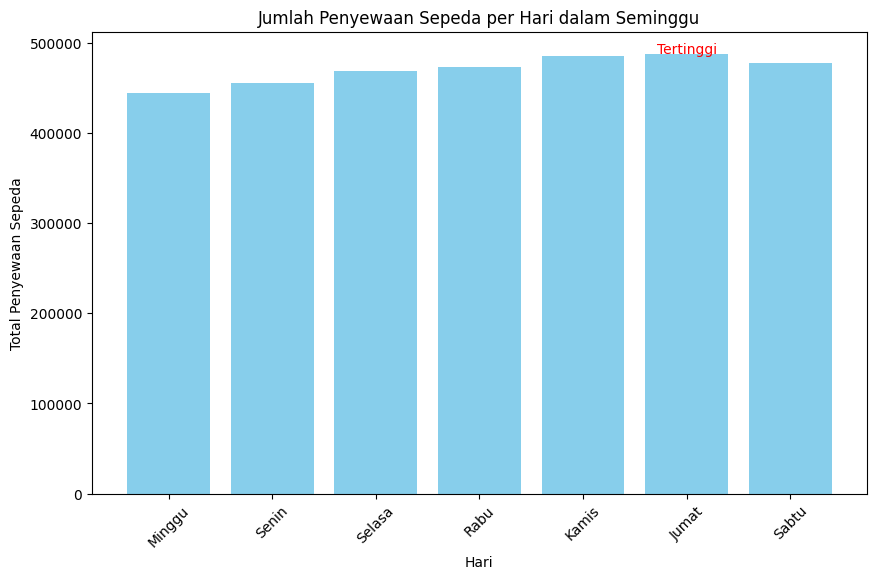

In [27]:
# Mengelompokkan data berdasarkan hari per minggu dan menghitung menjadi total penyewaan
daily_rentals = day_df.groupby('weekday', observed=True)['total_count'].sum().reset_index()

# Mencari hari dengan penyewaan terbanyak
max_rentals_day = daily_rentals[daily_rentals['total_count'] == daily_rentals['total_count'].max()]['weekday'].values[0]
max_rentals_value = daily_rentals['total_count'].max()

print(f"Hari dengan penyewaan sepeda terbanyak: {max_rentals_day} dengan total penyewaan {max_rentals_value}.")

# # Menampilkan ke bentuk bar plot
plt.figure(figsize=(10, 6))
plt.bar(daily_rentals['weekday'], daily_rentals['total_count'], color='skyblue')

# Menambahkan grafik dengan penjelasan nama hari dan total penyewaan sepeda perhari
plt.xlabel('Hari')
plt.ylabel('Total Penyewaan Sepeda')
plt.title('Jumlah Penyewaan Sepeda per Hari dalam Seminggu')

# Menampilkan teks tertinggi pada jumlah hari penyewa terbanyak
plt.text(max_rentals_day, max_rentals_value, 'Tertinggi', color='red', ha='center')

# menampilkan ke bentuk bar
plt.xticks(rotation=45)  #digunakan untuk membuat teks miring 45 derajat
plt.show()


### Pertanyaan 3 : Pada musim apa penyewaan sepeda paling banyak?

Musim dengan penyewaan sepeda terbanyak: Gugur dengan total penyewaan 1061129.


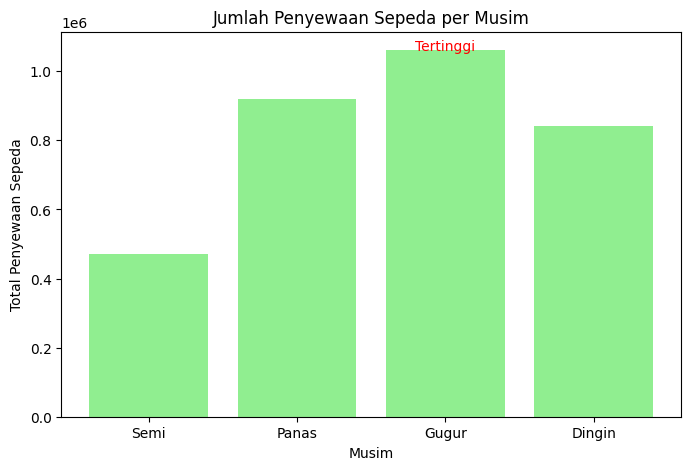

In [28]:
# Mengelompokkan data berdasarkan musim dan menghitung menjadi total penyewaan
seasonal_rentals = day_df.groupby('season', observed=True)['total_count'].sum().reset_index()

# Mencari musim dengan penyewaan terbanyak
max_rentals_season = seasonal_rentals[seasonal_rentals['total_count'] == seasonal_rentals['total_count'].max()]['season'].values[0]
max_rentals_value = seasonal_rentals['total_count'].max()

print(f"Musim dengan penyewaan sepeda terbanyak: {max_rentals_season} dengan total penyewaan {max_rentals_value}.")

# # Menampilkan ke bentuk bar plot
plt.figure(figsize=(8, 5))
plt.bar(seasonal_rentals['season'], seasonal_rentals['total_count'], color='lightgreen')

# Menambahkan grafik dengan penjelasan nama musim dan total penyewaan sepeda per musim
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan Sepeda')
plt.title('Jumlah Penyewaan Sepeda per Musim')

# Menampilkan teks tertinggi pada jumlah hari penyewa terbanyak
plt.text(max_rentals_season, max_rentals_value, 'Tertinggi', color='red', ha='center')

# menampilkan ke bentuk bar
plt.show()


### Pertanyaan 4 : Bagaimana grafik performa penjualan sepeda pada kedua tahun tersebut?

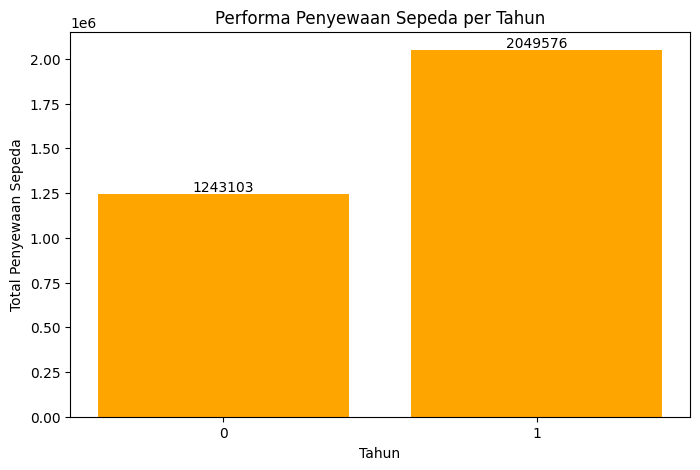

In [29]:
# Mengelompokkan data berdasarkan tahun dan menghitung menjadi total penyewaan
yearly_rentals = day_df.groupby('year')['total_count'].sum().reset_index()

# Mencari tahun dengan penyewaan terbanyak
plt.figure(figsize=(8, 5))
bars = plt.bar(yearly_rentals['year'], yearly_rentals['total_count'], color='orange')

# Menambahkan grafik dengan penjelasan tahun dan total penyewaan sepeda pertahun
plt.xlabel('Tahun')
plt.ylabel('Total Penyewaan Sepeda')
plt.title('Performa Penyewaan Sepeda per Tahun')

# Menambahkan nilai pada setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Menampilkan ke bentuk bar plot
plt.xticks(yearly_rentals['year'])  # Ensure all years are shown on the x-axis
plt.show()



Terdapat peningkatan penjualan antara tahun 2011 dengan 2012 dari 1243103 menjadi 2049576

## Conclusion

- Pertanyaan 1 : Jam berapa paling banyak dan paling sedikit terjadi penyewaaan sepeda?
- Pertanyaan 2 : Hari apa terjadi penyewaan sepeda paling banyak?
- Pertanyaan 3 : Pada musim apa penyewaan sepeda paling banyak?
- Pertanyaan 4 : Bagaimana grafik performa penjualan sepeda pada kedua tahun tersebut?





- Conclution pertanyaan 1 :
Jam 17.00 memiliki jumlah penyewaan sepeda tertinggi dengan total 336860 penyewaan.
Jam dengan penyewaan sepeda paling sedikit adalah jam 04.00 dengan total 4428 penyewaan.

- Conclution pertanyaan 2
Hari dengan penyewaan sepeda terbanyak adalah hari Jumat dengan total penyewaan 487790.

- Conclution pertanyaan 3
Musim dengan penyewaan sepeda terbanyak: Gugur dengan total penyewaan 1061129.

- Conclution pertanyaan 4
Terdapat peningkatan penjualan antara tahun 2011 dengan 2012 dari 1243103 menjadi 2049576

In [30]:
rfm_df = day_df.groupby(by="weekday", as_index=False, observed=True).agg({
    "date": "max", # mengambil tanggal order terakhir
    "record_index": "nunique", # menghitung jumlah order
    "total_count": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["weekday", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day_df["date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
print(rfm_df)

  weekday  frequency  monetary  recency
0  Minggu        105    444027        1
1   Senin        105    455503        0
2  Selasa        104    469109        6
3    Rabu        104    473048        5
4   Kamis        104    485395        4
5   Jumat        104    487790        3
6   Sabtu        105    477807        2


In [31]:
rfm_df2 = day_df.groupby(by="month", as_index=False, observed=True).agg({
    "date": "max", # mengambil tanggal order terakhir
    "record_index": "nunique", # menghitung jumlah order
    "total_count": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df2.columns = ["month", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df2["max_order_timestamp"] = rfm_df2["max_order_timestamp"].dt.date
recent_date = day_df["date"].dt.date.max()
rfm_df2["recency"] = rfm_df2["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df2.drop("max_order_timestamp", axis=1, inplace=True)
print(rfm_df2)

        month  frequency  monetary  recency
0     Januari         62    134933      335
1    Februari         57    151352      306
2       Maret         62    228920      275
3       April         60    269094      245
4         Mei         62    331686      214
5        Juni         60    346342      184
6        Juli         62    344948      153
7     Agustus         62    351194      122
8   September         60    345991       92
9     Oktober         62    322352       61
10   November         60    254831       31
11   December         62    211036        0
